<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 
<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [25]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 137.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [27]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [29]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [30]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [32]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [45]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")


Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


In [47]:
import pandas as pd

# Load Tesla stock data from the uploaded CSV file
tesla_data = pd.read_csv("tesla_stock.csv")

# Convert Date column to datetime
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

# Display first 5 rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume
0,2020-01-02,86.05,90.8,84.34,88.6,10000000
1,2020-02-03,130.00,135.0,121.00,133.5,15000000
2,2020-03-02,133.25,143.0,115.67,120.0,17000000
3,2020-04-01,114.00,123.0,109.80,120.2,12000000
4,2020-05-01,149.77,158.0,141.52,153.0,11000000


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [48]:
import pandas as pd

# Load Tesla stock data from the uploaded CSV file
tesla_data = pd.read_csv("tesla_stock.csv")

# Convert Date column to datetime
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()


,index,Date,Open,High,Low,Close,Volume
0,0,2020-01-02,86.05,90.8,84.34,88.6,10000000
1,1,2020-02-03,130.00,135.0,121.00,133.5,15000000
2,2,2020-03-02,133.25,143.0,115.67,120.0,17000000
3,3,2020-04-01,114.00,123.0,109.80,120.2,12000000
4,4,2020-05-01,149.77,158.0,141.52,153.0,11000000


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [ ]:
import requests

# Download the Tesla revenue webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Save the HTML content
html_data = response.text


We can get the <code>'country'</code> using the key country


In [ ]:
from bs4 import BeautifulSoup

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")


In [56]:
import pandas as pd

# Find the Tesla revenue table (second <tbody>)
tbody = soup.find_all("tbody")[1]

# Create an empty list to store rows
data = []

# Loop through rows
for row in tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append({"Date": date, "Revenue": revenue})

# Create the DataFrame
tesla_revenue = pd.DataFrame(data)

# Display the first few rows
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [72]:
import pandas as pd

# Load GameStop stock data from provided CSV
gme_data = pd.read_csv("gme.csv")

# Convert 'Date' column to datetime format
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Show first few rows
gme_data.head()


,Date,Revenue
0,2023-04-30,$1.237B
1,2023-01-31,$2.226B
2,2022-10-31,$1.186B
3,2022-07-31,$1.136B
4,2022-04-30,$1.378B


In [73]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")


In [76]:
import pandas as pd

# Read the uploaded CSV file
gme_data = pd.read_csv("gme.csv")

# Preview the data
gme_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jul 18, 2025",23.46,23.51,23.13,23.28,23.28,6607900
1,"Jul 17, 2025",23.54,23.72,23.38,23.40,23.40,7307200
2,"Jul 16, 2025",23.40,23.85,23.31,23.68,23.68,7738300
3,"Jul 15, 2025",23.66,23.81,23.17,23.22,23.22,7321600
4,"Jul 14, 2025",23.44,23.84,23.39,23.70,23.70,7769600


In [81]:
import pandas as pd

# Load GameStop stock data from CSV
gme_data = pd.read_csv("gme.csv")

# Reset index (only if 'Date' column exists and is not already in the right format)
gme_data.reset_index(drop=True, inplace=True)

# Show first 5 rows
gme_data.head()
gme_data = pd.read_csv("gme.csv", parse_dates=["Date"])


In [79]:
gme_data = pd.read_csv("gme.csv", parse_dates=["Date"])


The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [82]:
import requests

# URL for GME revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Store the HTML content
html_data_2 = response.text


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [84]:
from bs4 import BeautifulSoup

# Parse the HTML content using html.parser
soup2 = BeautifulSoup(html_data_2, "html.parser")


In [85]:
from bs4 import BeautifulSoup

# Parse the HTML content using html.parser
soup2 = BeautifulSoup(html_data_2, "html.parser")


In [86]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Get the HTML
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

# Step 2: Parse with BeautifulSoup
soup = BeautifulSoup(html_data_2, "html.parser")

# Step 3: Locate the second table (GameStop Revenue)
tbody = soup.find_all("tbody")[1]
rows = tbody.find_all("tr")

# Step 4: Extract Date and Revenue
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

# Step 5: Display first few rows
gme_revenue.head()


,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


In [87]:
gme_revenue.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


We can plot the `Open` price against the `Date`:


In [89]:
!pip install matplotlib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 133.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 127.3 MB/s eta 0:00:00


In [90]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data.Date, data.Close)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price USD ($)')
    plt.grid(True)
    plt.show()


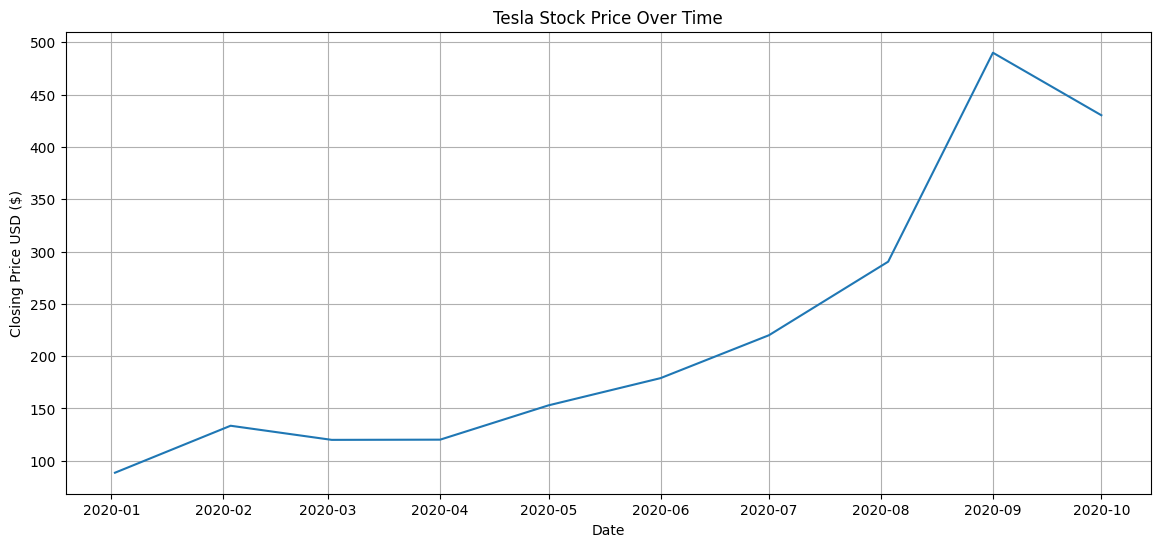

In [91]:
make_graph(tesla_data, 'Tesla Stock Price Over Time')


### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [92]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.set_title(f"{stock} Stock Price & Revenue")
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue')
    ax1.set_ylabel("Stock Price (USD)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='green')
    ax2.set_ylabel("Revenue (USD Millions)", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    fig.tight_layout()
    plt.grid(True)
    plt.show()


We can plot the dividends overtime:


<Axes: xlabel='Date'>

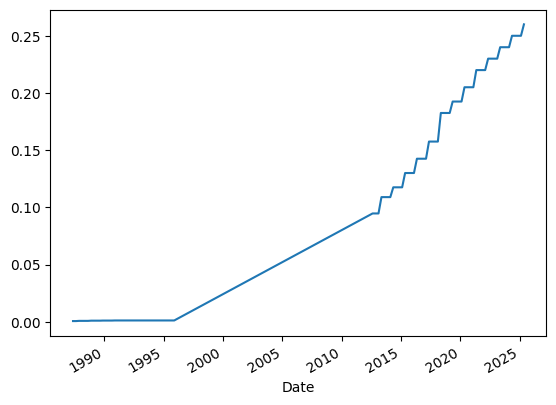

In [40]:
apple.dividends.plot()

In [94]:
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])


In [95]:
gme_data['Date'] = pd.to_datetime(gme_data['Date'])


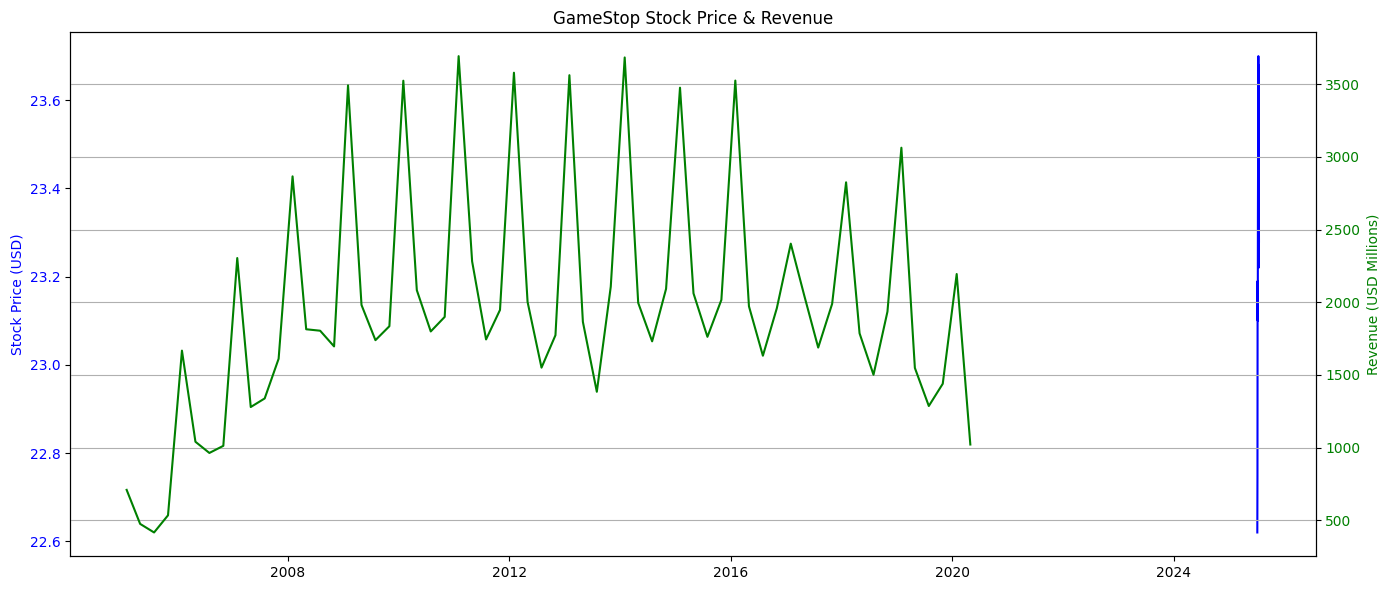

In [96]:
make_graph(gme_data, gme_revenue, 'GameStop')


## Exercise 


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [27]:
import yfinance as yf

# Create a Ticker object for AMD
amd = yf.Ticker("AMD")

In [28]:
print(amd.info['longName'])  # Output: "Advanced Micro Devices, Inc."

Advanced Micro Devices, Inc.


In [29]:
amd.history(period="1y")  # 1-year historical data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-18 00:00:00-04:00,163.410004,163.410004,153.199997,155.770004,69420300,0.0,0.0
2024-07-19 00:00:00-04:00,154.860001,155.809998,150.619995,151.580002,47513100,0.0,0.0
2024-07-22 00:00:00-04:00,154.229996,156.699997,152.539993,155.869995,43912500,0.0,0.0
2024-07-23 00:00:00-04:00,154.949997,157.050003,153.800003,154.000000,31950600,0.0,0.0
2024-07-24 00:00:00-04:00,152.720001,153.679993,144.529999,144.630005,49203100,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-14 00:00:00-04:00,145.089996,147.580002,141.899994,146.240005,44718600,0.0,0.0
2025-07-15 00:00:00-04:00,153.750000,158.679993,153.559998,155.610001,93370100,0.0,0.0
2025-07-16 00:00:00-04:00,155.309998,160.360001,152.850006,160.080002,59492800,0.0,0.0


<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [32]:
# Get all company info (metadata)
company_info = amd.info

# Extract the country
country = company_info.get('country', 'Not Found')
print(f"AMD's country: {country}")

AMD's country: United States


<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [33]:
# Get all company metadata
company_info = amd.info

# Extract the sector
sector = company_info.get('sector', 'Not Found')
print(f"AMD's sector: {sector}")

AMD's sector: Technology


<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


In [35]:
import yfinance as yf

# Create AMD Ticker object
amd = yf.Ticker("AMD")

# Get all historical data
amd_history = amd.history(period="max")

# Display first few rows to verify
print(amd_history.head())

                               Open      High       Low     Close  Volume  \
Date                                                                        
1980-03-17 00:00:00-05:00  3.125000  3.302083  3.125000  3.145833  219600   
1980-03-18 00:00:00-05:00  3.125000  3.125000  2.937500  3.031250  727200   
1980-03-19 00:00:00-05:00  3.031250  3.083333  3.020833  3.041667  295200   
1980-03-20 00:00:00-05:00  3.041667  3.062500  3.010417  3.010417  159600   
1980-03-21 00:00:00-05:00  3.010417  3.020833  2.906250  2.916667  130800   

                           Dividends  Stock Splits  
Date                                                
1980-03-17 00:00:00-05:00        0.0           0.0  
1980-03-18 00:00:00-05:00        0.0           0.0  
1980-03-19 00:00:00-05:00        0.0           0.0  
1980-03-20 00:00:00-05:00        0.0           0.0  
1980-03-21 00:00:00-05:00        0.0           0.0  


In [36]:
# Get volume from first row
first_day_volume = amd_history.iloc[0]['Volume']

print(f"Volume traded on AMD's first day: {first_day_volume:,} shares")

Volume traded on AMD's first day: 219,600.0 shares


### Question 4 - Extracting GameStop Revenue Data Using CSV


In [44]:
import pandas as pd

# Load the CSV file
gme_revenue = pd.read_csv("gme_revenue.csv")

# Clean the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "", regex=True).str.replace(",", "", regex=True).astype(float)

# Show the first few rows
gme_revenue.head()


FileNotFoundError: [Errno 2] No such file or directory: 'gme_revenue.csv'

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


<!-- ## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>-->

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
